In [43]:
def parse_file(file_path):
    tmp = []
    with open(file_path, 'r') as file:
        for line in file:
            tmp.append(line.split("(")[0].lstrip("#"))
    return tmp
uring_parse = parse_file('iouring_c.log')

In [45]:
normal_parse = parse_file('original_c.log')

In [47]:
from collections import Counter

In [54]:
uring_parse = Counter(uring_parse)
normal_parse = Counter(normal_parse)

In [62]:
len(uring_parse.keys())

46

In [64]:
len(normal_parse.keys())

41

In [99]:
normal_parse

Counter({'read': 565,
         'writev': 431,
         'write': 323,
         'futex': 234,
         'getrandom': 49,
         'clone3': 44,
         'getsockname': 33,
         'connect': 31,
         'openat': 25,
         'munmap': 21,
         'stat': 19,
         'gettid': 16,
         'recvmsg': 15,
         'poll': 13,
         'execve': 12,
         'recvfrom': 10,
         'mkdir': 6,
         'ioctl': 5,
         'lstat': 5,
         'readlink': 5,
         'sendmmsg': 5,
         'sendto': 5,
         'unlink': 5,
         'lseek': 4,
         'fstat': 2,
         'getcwd': 2,
         'getdents64': 2,
         'getpeername': 2,
         'getpid': 2,
         'link': 2,
         'mprotect': 2,
         'newfstatat': 2,
         'pipe2': 2,
         'sched_getaffinity': 2,
         'set_tid_address': 2,
         'statfs': 2,
         'mmap': 1,
         'rename': 1,
         'rmdir': 1,
         'sysinfo': 1,
         'wait4': 1})

In [68]:
import matplotlib.pyplot as plt

In [72]:
sorted_data = dict(sorted(uring_parse.items(), key=lambda item: item[1], reverse=True))
syscalls = list(sorted_data.keys())
counts = list(sorted_data.values())

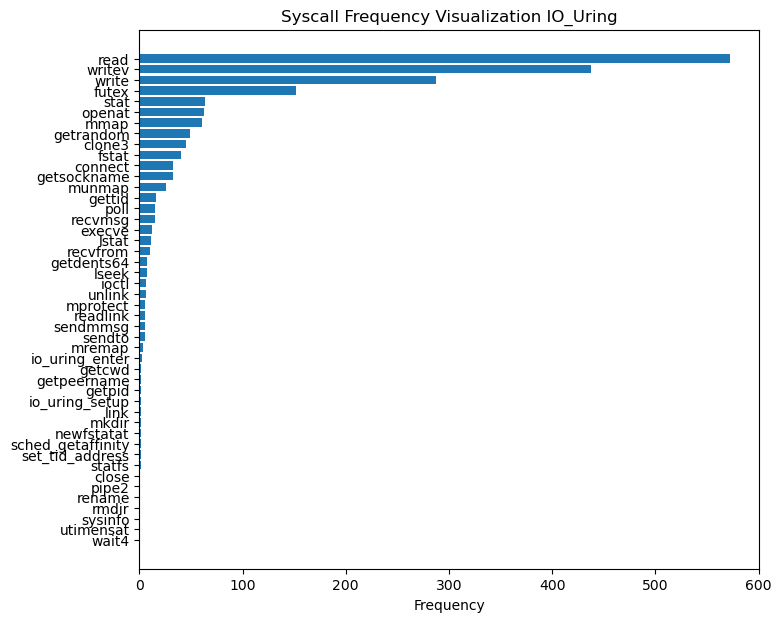

In [88]:
plt.figure(figsize=(8, 7))
plt.barh(syscalls, counts)
plt.xlabel('Frequency')
plt.title('Syscall Frequency Visualization IO_Uring')
plt.gca().invert_yaxis()  
plt.show()

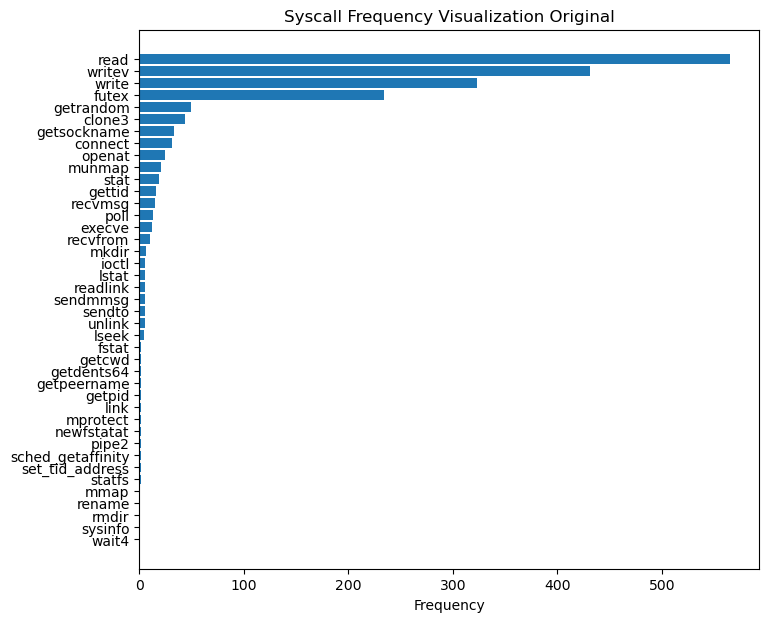

In [95]:
sorted_data = dict(sorted(normal_parse.items(), key=lambda item: item[1], reverse=True))
syscalls = list(sorted_data.keys())
counts = list(sorted_data.values())


plt.figure(figsize=(8, 7))
plt.barh(syscalls, counts)
plt.xlabel('Frequency')
plt.title('Syscall Frequency Visualization Original')
plt.gca().invert_yaxis()  
plt.show()

In [101]:
all_call = set(uring_parse.keys()).union(set(normal_parse.keys()))

In [116]:
diff = dict()
for i in all_call:
    if i in uring_parse and i in normal_parse:
        diff[i] = uring_parse[i] - normal_parse[i]
    if i in uring_parse and i not in normal_parse:
        diff[i] = uring_parse[i]
    if i not in uring_parse and i in normal_parse:
        diff[i] = normal_parse[i]

In [136]:
sorted_diff_data = sorted(diff.items(), key=lambda item: abs(item[1]), reverse=True)

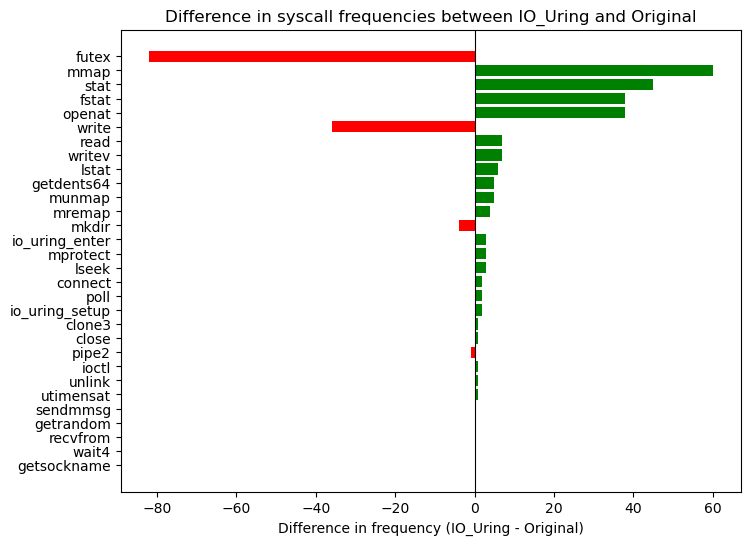

In [150]:
syscalls = [i[0] for i in sorted_diff_data][0:30]
diff_counts = [i[1] for i in sorted_diff_data][0:30]

plt.figure(figsize=(8, 6))
plt.barh(syscalls, diff_counts, color=['green' if x >= 0 else 'red' for x in diff_counts])
plt.xlabel('Difference in frequency (IO_Uring - Original)')
plt.title('Difference in syscall frequencies between IO_Uring and Original')
plt.axvline(0, color='black',linewidth=0.8) 
plt.gca().invert_yaxis()  
plt.show()